<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/3_Moving_Avg_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import time
from datetime import datetime

In [78]:
!pip install yfinance
import yfinance as yf

In [76]:
end_date = datetime.today().strftime('%Y-%m-%d')
df=yf.download('TSLA',start='2023-11-01',end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-01,204.039993,205.990005,197.850006,205.660004,205.660004,121661700
2023-11-02,212.970001,219.199997,211.449997,218.509995,218.509995,125987600
2023-11-03,221.149994,226.369995,218.399994,219.960007,219.960007,119281000
2023-11-06,223.979996,226.320007,215.000000,219.270004,219.270004,117335800
2023-11-07,219.979996,223.119995,215.720001,222.179993,222.179993,116900100
...,...,...,...,...,...,...
2024-08-09,197.050003,200.880005,195.110001,200.000000,200.000000,58648300
2024-08-12,199.020004,199.259995,194.669998,197.490005,197.490005,64044900
2024-08-13,198.470001,208.490005,197.059998,207.830002,207.830002,76247400


In [79]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [80]:
df.index

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
               '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
               '2023-11-13', '2023-11-14',
               ...
               '2024-08-02', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09', '2024-08-12', '2024-08-13',
               '2024-08-14', '2024-08-15'],
              dtype='datetime64[ns]', name='Date', length=198, freq=None)

In [81]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


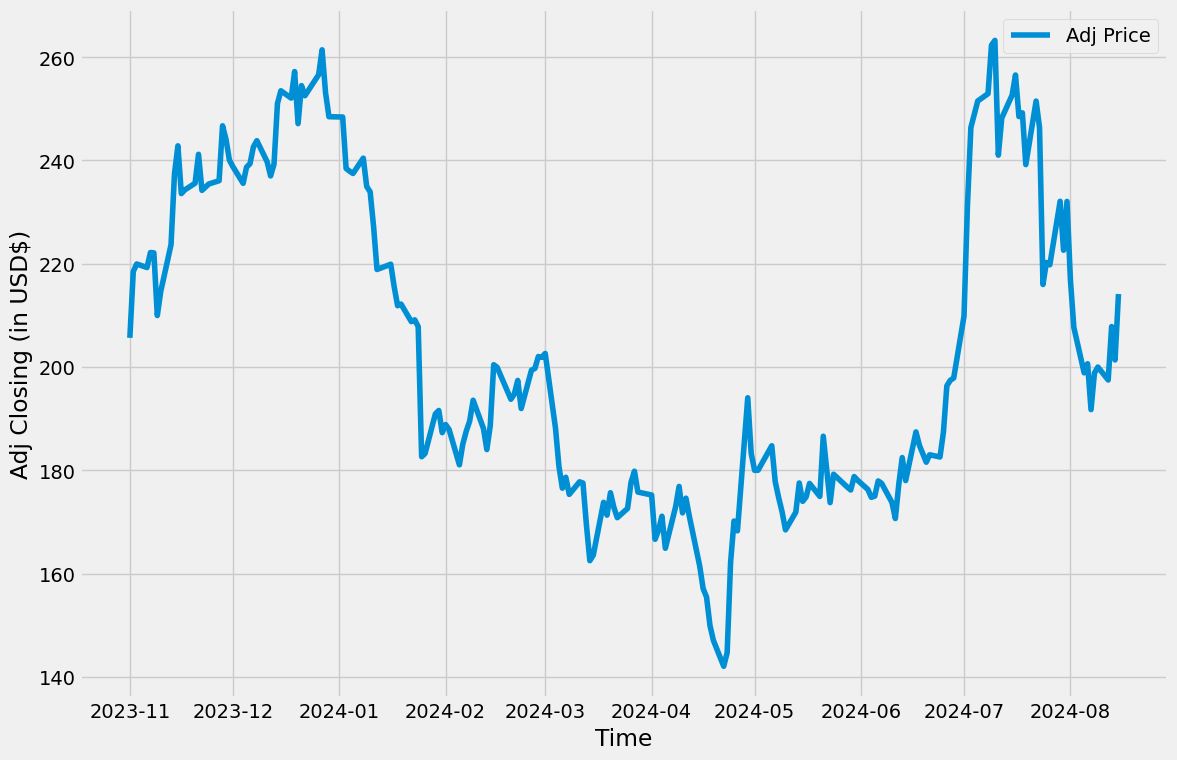

In [82]:
plt.figure(figsize=(12.5,8.5))
plt.plot(df['Adj Close'],label='Adj Price')
plt.xlabel('Time')
plt.ylabel('Adj Closing (in USD$)')
plt.legend()
plt.show()

In [83]:
#calculatin gthe short exponential moving average
ShortEMA=df.Close.ewm(span=5,adjust=False).mean()
#claculation of the long exponentail moving average
LongEMA=df.Close.ewm(span=63,adjust=False).mean()
#calculating the medium exponential moving average
MiddleEMA=df.Close.ewm(span=21,adjust=False).mean()

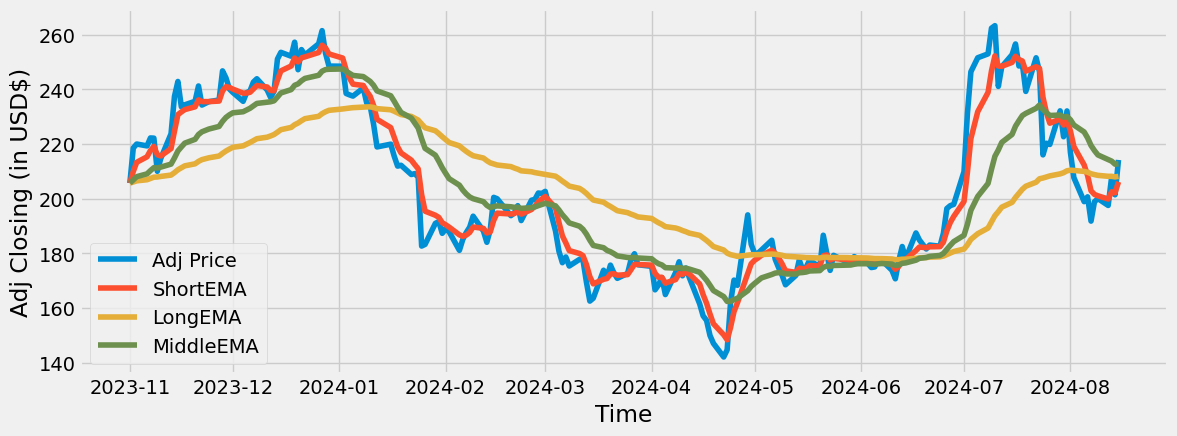

In [84]:
plt.figure(figsize=(12.5,4.5))
plt.plot(df['Adj Close'],label='Adj Price')
plt.plot(ShortEMA,label='ShortEMA')
plt.plot(LongEMA,label='LongEMA')
plt.plot(MiddleEMA,label='MiddleEMA')
plt.xlabel('Time')
plt.ylabel('Adj Closing (in USD$)')
plt.legend()
plt.show()

In [85]:
df['ShortEMA']=ShortEMA
df['MiddleEMA']=MiddleEMA
df['LongEMA']=LongEMA

In [86]:
df

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,MiddleEMA,LongEMA
Date,,,,,,,,,
2023-11-01,204.039993,205.990005,197.850006,205.660004,205.660004,121661700,205.660004,205.660004,205.660004
2023-11-02,212.970001,219.199997,211.449997,218.509995,218.509995,125987600,209.943334,206.828185,206.061566
2023-11-03,221.149994,226.369995,218.399994,219.960007,219.960007,119281000,213.282225,208.021987,206.495892
2023-11-06,223.979996,226.320007,215.000000,219.270004,219.270004,117335800,215.278151,209.044534,206.895083
2023-11-07,219.979996,223.119995,215.720001,222.179993,222.179993,116900100,217.578765,210.238666,207.372737
...,...,...,...,...,...,...,...,...,...
2024-08-09,197.050003,200.880005,195.110001,200.000000,200.000000,58648300,201.017486,215.969976,208.495882
2024-08-12,199.020004,199.259995,194.669998,197.490005,197.490005,64044900,199.841659,214.289979,208.151949
2024-08-13,198.470001,208.490005,197.059998,207.830002,207.830002,76247400,202.504440,213.702708,208.141888


In [87]:
def buy_sell(data):
  buy_list=[]
  sell_list=[]
  flag_long=0
  flag_short=0

  for i in range(0,len(data)):
    if data['MiddleEMA'][i]<data['LongEMA'][i] and data['ShortEMA'][i]<data['MiddleEMA'][i] and flag_long==False and flag_short==False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_short=True
    elif flag_short==True and data['ShortEMA'][i]>data['MiddleEMA'][i]: # Use 'MiddleEMA' instead of 'Middle'
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_short=False
    elif data['MiddleEMA'][i]<data['LongEMA'][i] and data['ShortEMA'][i]>data['MiddleEMA'][i] and flag_long==False and flag_short==False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_long=True
    elif flag_long==True and data['ShortEMA'][i]<data['MiddleEMA'][i]: # Use 'MiddleEMA' instead of 'Middle'
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_long=False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  return(buy_list,sell_list)

In [88]:
df['Buy']=buy_sell(df)[0]
df['Sell']=buy_sell(df)[1]

df

<ipython-input-87-33c6004c8f13>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['MiddleEMA'][i]<data['LongEMA'][i] and data['ShortEMA'][i]<data['MiddleEMA'][i] and flag_long==False and flag_short==False:
<ipython-input-87-33c6004c8f13>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['MiddleEMA'][i]<data['LongEMA'][i] and data['ShortEMA'][i]>data['MiddleEMA'][i] and flag_long==False and flag_short==False:
<ipython-input-87-33c6004c8f13>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with 

,Open,High,Low,Close,Adj Close,Volume,ShortEMA,MiddleEMA,LongEMA,Buy,Sell
Date,,,,,,,,,,,
2023-11-01,204.039993,205.990005,197.850006,205.660004,205.660004,121661700,205.660004,205.660004,205.660004,NaN,NaN
2023-11-02,212.970001,219.199997,211.449997,218.509995,218.509995,125987600,209.943334,206.828185,206.061566,NaN,NaN
2023-11-03,221.149994,226.369995,218.399994,219.960007,219.960007,119281000,213.282225,208.021987,206.495892,NaN,NaN
2023-11-06,223.979996,226.320007,215.000000,219.270004,219.270004,117335800,215.278151,209.044534,206.895083,NaN,NaN
2023-11-07,219.979996,223.119995,215.720001,222.179993,222.179993,116900100,217.578765,210.238666,207.372737,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,197.050003,200.880005,195.110001,200.000000,200.000000,58648300,201.017486,215.969976,208.495882,NaN,NaN
2024-08-12,199.020004,199.259995,194.669998,197.490005,197.490005,64044900,199.841659,214.289979,208.151949,NaN,NaN
2024-08-13,198.470001,208.490005,197.059998,207.830002,207.830002,76247400,202.504440,213.702708,208.141888,NaN,NaN


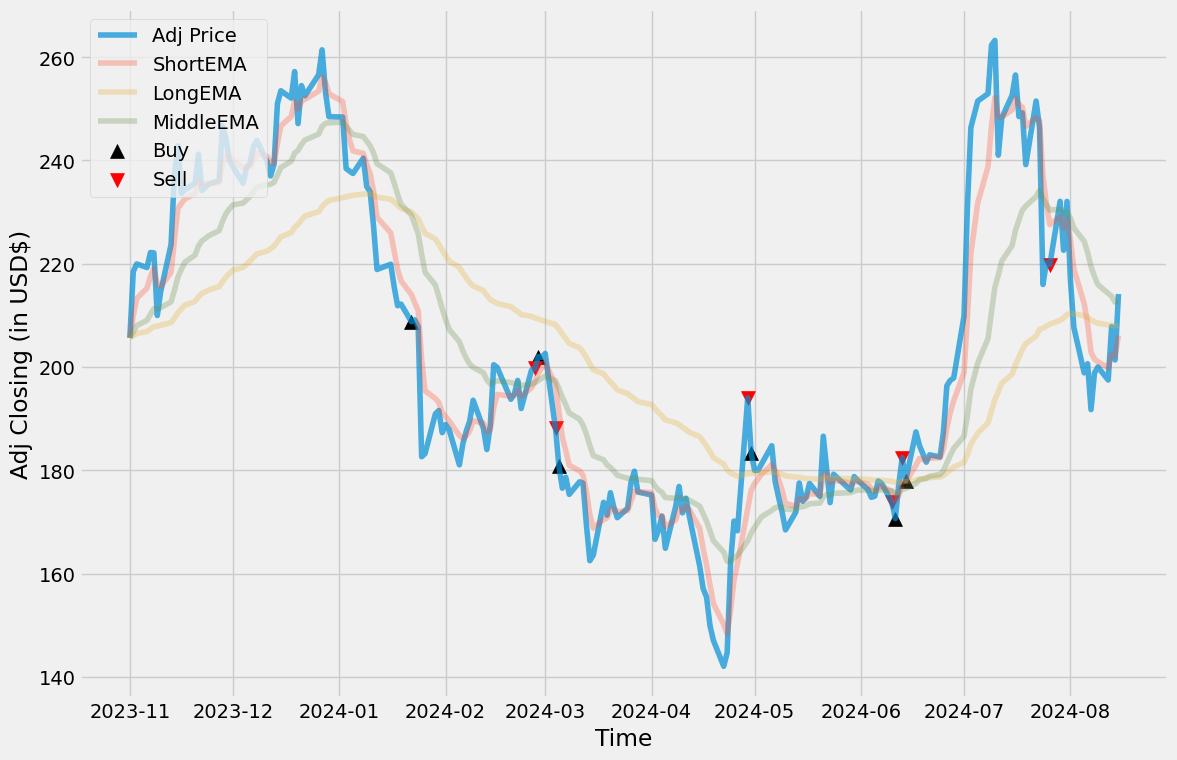

In [106]:
plt.figure(figsize=(12.5,8.5))
plt.plot(df['Adj Close'],label='Adj Price',alpha=0.7)
plt.plot(ShortEMA,label='ShortEMA',alpha=0.3)
plt.plot(LongEMA,label='LongEMA',alpha=0.3)
plt.plot(MiddleEMA,label='MiddleEMA',alpha=0.3)
plt.scatter(df.index, df['Buy'], label='Buy',marker='^',color='Black',s=100)
plt.scatter(df.index, df['Sell'], label='Sell',marker='v',color='red',s=100)
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Adj Closing (in USD$)')
plt.show()